#VIOLÊNCIA CONTRA A MULHER NO ESTADO DE MINAS GERAIS

O banco de dados de violência contra mulher contempla os registros de casos suspeitos ou confirmados, inseridos no Sistema de Informação de Agravos de Notificação (Sinan), que é alimentado, pelas unidades de saúde, com informações sobre doenças e agravos, que constam na lista nacional de doenças de notificação compulsória.  



O Sinan coleta, transmite e dissemina os dados gerados rotineiramente pelo Sistema de Vigilância Epidemiológica das três esferas de governo, por intermédio de uma rede informatizada. A ficha do Sinan possibilita que outras unidades façam a notificação, tais como: estabelecimento de ensino, conselho tutelar, unidade da assistência social, centro especializado de atendimento à mulher e unidades de saúde indígena. Desse modo, quando essas unidades identificarem um caso de violência, é possível fazer a notificação de violência utilizando a ficha de notificação de violência interpessoal/autoprovocada, sendo, em seguida, encaminhada para uma unidade de saúde de referência no território para fins de digitação.




Os dados foram extraídos do Sinan por meio do tabulador de informações em saúde Tabnet, com a seleção dos casos de violência contra a mulher, incluindo violência física, psicológica, sexual e autoprovocada, no período de 2020 até 2023.




Em relação aos tipos de violência, salienta-se que o Instrutivo da Ficha de Notificação de Violência Interpessoal/Autoprovocada orienta assinalar no campo “Tipo de Violência” somente o principal tipo de violência sofrida. Todavia, em alguns registros este campo é preenchido com mais de um tipo de violência.



Destaca-se que, o preenchimento adequado da ficha de notificação de violência interpessoal/autoprovocada é fundamental para o fornecimento de informações precisas, completas e oportunas, que reflitam de forma adequada o perfil epidemiológico.

FONTE: https://dados.gov.br/dados/conjuntos-dados/dados_violencia_geral_ses

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Realizando a leitura dos arquivos e garantido a formatação da data.

base_dados = pd.read_csv("/content/drive/MyDrive/Projeto final Samung/dados_violencia_mulheres_ses_2023.csv", sep=";")
base_dados['DT_NOTIFIC'] = pd.to_datetime(base_dados['DT_NOTIFIC'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')


base_dados1 = pd.read_csv("/content/drive/MyDrive/Projeto final Samung/dados_violencia_mulheres_ses_2022.csv",sep=",")
base_dados1['DT_NOTIFIC'] = pd.to_datetime(base_dados1['DT_NOTIFIC'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')


base_dados2 = pd.read_csv("/content/drive/MyDrive/Projeto final Samung/dados_violencia_mulheres_ses_2021.csv",sep=",")
base_dados2['DT_NOTIFIC'] = pd.to_datetime(base_dados2['DT_NOTIFIC'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')


base_dados3 = pd.read_csv("/content/drive/MyDrive/Projeto final Samung/dados_violencia_mulheres_ses_2020.csv",sep=";")
base_dados3['DT_NOTIFIC'] = pd.to_datetime(base_dados3['DT_NOTIFIC'], format='%d/%m/%Y').dt.strftime('%d/%m/%Y')


# Criando uma lista para juntar em um arquivo só.
lista = [base_dados, base_dados1, base_dados2, base_dados3]

# Criando a base final e garantido que a coluna Data tenha os meses.
base_final = pd.concat(lista)
base_final['DT_NOTIFIC'] = pd.to_datetime(base_final['DT_NOTIFIC'],format='%d/%m/%Y')
base_final['DT_NOTIFIC'] = base_final['DT_NOTIFIC'].dt.strftime('%B')

In [ ]:
# Criando uma lita para renomer as colunas.
colunas_novas= traducoes = [
    "Data de Notificação",
    "Data de Nascimento",
    "Idade",
    "Sexo",
    "Raça",
    "Município de Residência",
    "Local de Ocorrência",
    "Ocorrências Anteriores",
    "Lesões Autoprovocadas",
    "Violência Física",
    "Violência Psicológica",
    "Violência Sexual",
    "Número de Envolvidos",
    "Gênero do Autor",
    "Orientação Sexual",
    "Identidade de Gênero"
                          ]

In [ ]:
# Renomeando as colunas.
base_final.columns = colunas_novas
base_final

,Data de Notificação,Data de Nascimento,Idade,Sexo,Raça,Município de Residência,Local de Ocorrência,Ocorrências Anteriores,Lesões Autoprovocadas,Violência Física,Violência Psicológica,Violência Sexual,Número de Envolvidos,Gênero do Autor,Orientação Sexual,Identidade de Gênero
0,January,21/03/2008,14.0,Feminino,Branca,Rio Novo,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Ignorado
1,January,29/11/1976,46.0,Feminino,Branca,Carmo do Rio Claro,Residencia,Sim,Não,Sim,Não,Não,Um,Masculino,Heterossexual,Ignorado
2,January,10/05/1997,25.0,Feminino,Parda,Pirapora,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
3,January,02/10/1982,40.0,Feminino,Parda,Várzea da Palma,Residencia,Ignorado,Sim,Sim,Não,Não,Um,Feminino,Heterossexual,Não se aplica
4,January,10/11/2016,6.0,Feminino,Parda,Guaraciaba,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino,Não se aplica,Não se aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29677,February,25/12/1981,38.0,Feminino,Parda,Araguari,Residencia,Sim,Não,Sim,Não,Não,Dois ou mais,Masculino,Heterossexual,Não se aplica
29678,February,16/09/1988,31.0,Feminino,Parda,Araguari,Outro,Ignorado,Não,Sim,Não,Não,Um,Masculino,Ignorado,Ignorado
29679,January,14/09/1997,22.0,Feminino,Branca,Araguari,Via pública,Ignorado,Não,Sim,Não,Não,Dois ou mais,Masculino,Heterossexual,Ignorado
29680,December,14/09/1989,31.0,Feminino,Branca,Araguari,Residencia,Ignorado,Ignorado,Sim,Não,Não,Um,Masculino,Ignorado,Ignorado


In [ ]:
# Retirando o valor negativo e substituindo pela media
base_final.at[7954, 'Idade'] = 30

# Realizando a limpeza da tabela.
base_final = base_final.loc[base_final['Data de Notificação'] != 'Ignorado']
base_final = base_final.loc[base_final['Idade'] != 'Ignorado']
base_final = base_final.loc[base_final['Raça'] != 'Ignorado']
base_final = base_final.loc[base_final['Município de Residência'] != 'Ignorado']

# Substituindo valores.
base_final['Local de Ocorrência'] = base_final['Local de Ocorrência'].replace('Ignorado', 'Outro')

# Realizando a limpeza da tabela.
base_final = base_final.loc[base_final['Ocorrências Anteriores'] != 'Ignorado']
base_final = base_final.loc[base_final['Lesões Autoprovocadas'] != 'Ignorado']
base_final = base_final.loc[base_final['Violência Física'] != 'Ignorado']
base_final = base_final.loc[base_final['Violência Psicológica'] != 'Ignorado']
base_final = base_final.loc[base_final['Violência Sexual'] != 'Ignorado']
base_final = base_final.loc[base_final['Número de Envolvidos'] != 'Ignorado']
base_final = base_final.loc[base_final['Gênero do Autor'] != 'Ignorado']

# Apagando todos os dados vázios.
base_final = base_final.dropna()

# Apagando as colunas desnecessárias.
base_final = base_final.drop('Orientação Sexual', axis = 1)
base_final = base_final.drop('Identidade de Gênero', axis = 1)
base_final = base_final.drop('Data de Nascimento', axis = 1)


#Explorando os dados com gráficos

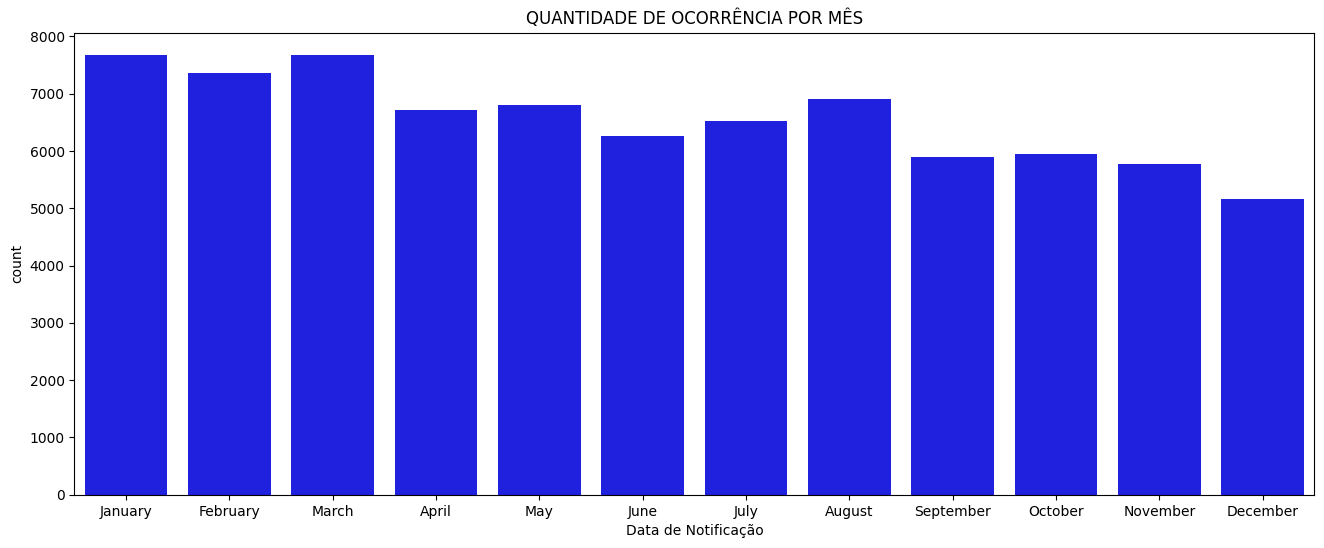

In [ ]:
# Quantidade de ocorrência por mês
plt.figure(figsize= (16 ,6))
sns.countplot(base_final, x="Data de Notificação", color="blue")
plt.title("QUANTIDADE DE OCORRÊNCIA POR MÊS");

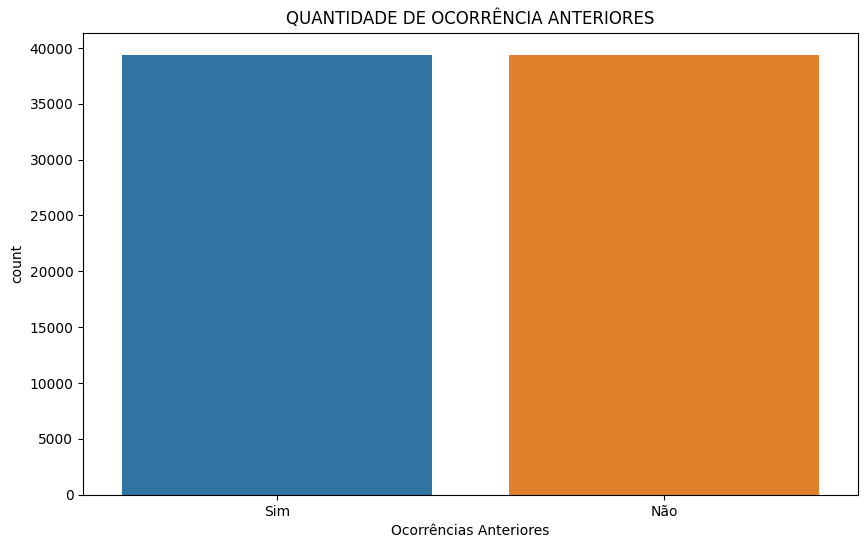

In [ ]:
# Quantidade de ocorrências anteriores
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Ocorrências Anteriores")
plt.title("QUANTIDADE DE OCORRÊNCIA ANTERIORES");

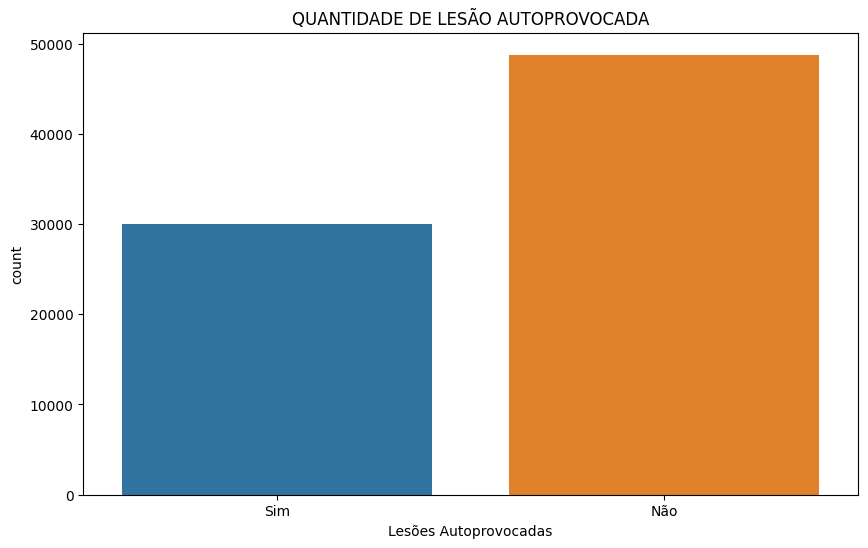

In [ ]:
# Quantidade de lesão autoprovocada
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Lesões Autoprovocadas")
plt.title("QUANTIDADE DE LESÃO AUTOPROVOCADA");

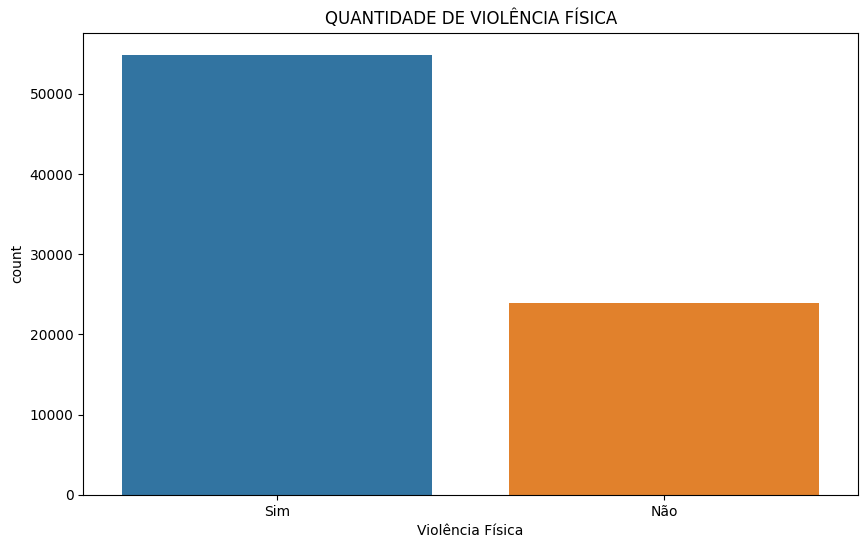

In [ ]:
# Quantidade de violência física
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Violência Física")
plt.title("QUANTIDADE DE VIOLÊNCIA FÍSICA");

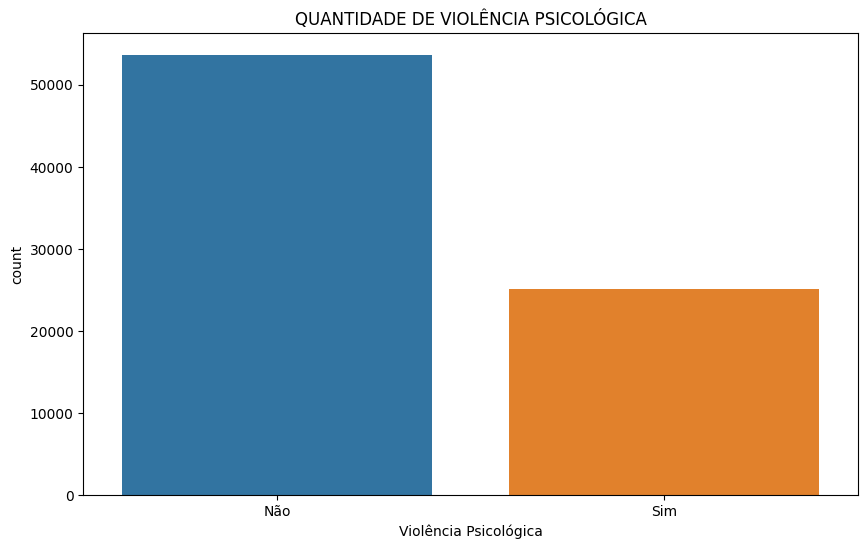

In [ ]:
# Quantidade de violencia psicológica
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Violência Psicológica")
plt.title("QUANTIDADE DE VIOLÊNCIA PSICOLÓGICA");

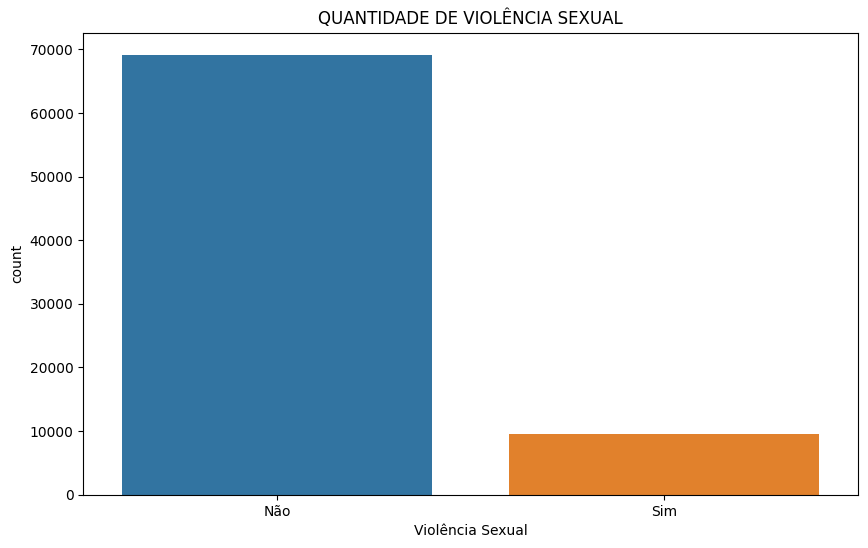

In [ ]:
# Quantidade de violência sexual
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Violência Sexual")
plt.title("QUANTIDADE DE VIOLÊNCIA SEXUAL");


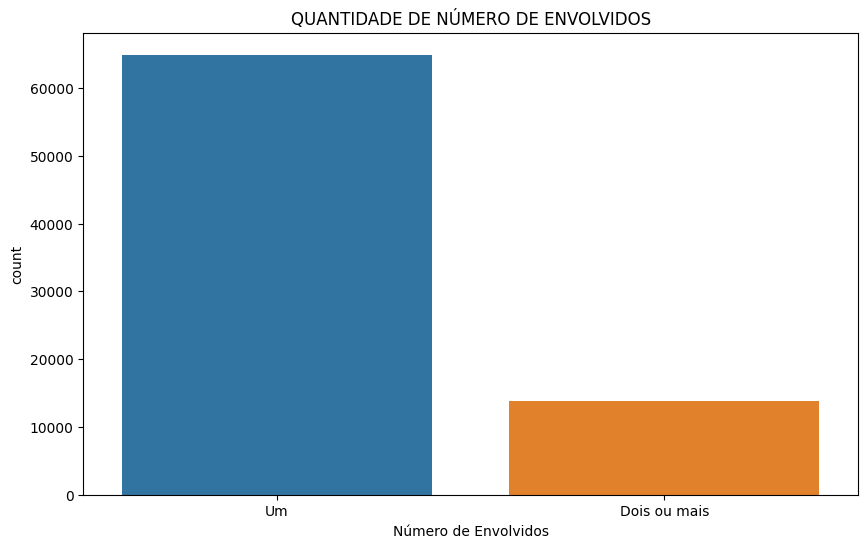

In [ ]:
# Quantidade de números envolvidos
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Número de Envolvidos")
plt.title("QUANTIDADE DE NÚMERO DE ENVOLVIDOS");

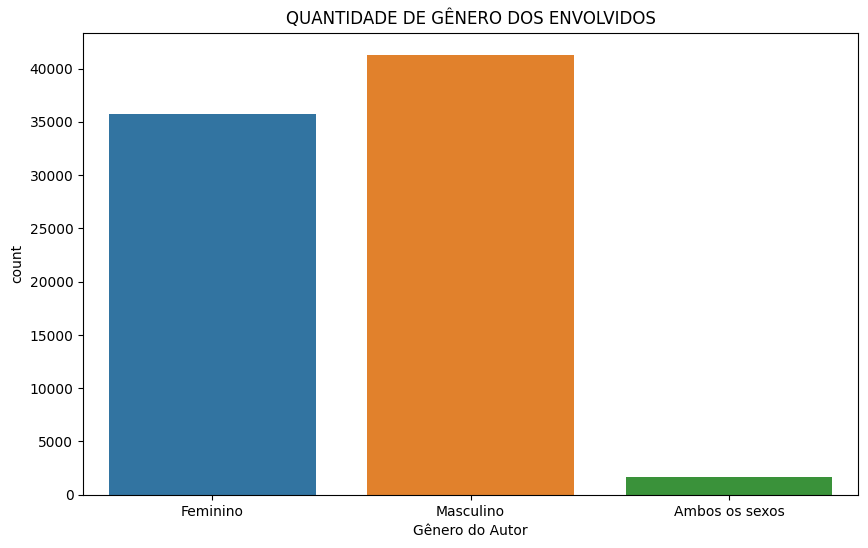

In [ ]:
# Quantidade de gênero envolvidos
plt.figure(figsize= (10 ,6))
sns.countplot(base_final, x="Gênero do Autor")
plt.title("QUANTIDADE DE GÊNERO DOS ENVOLVIDOS");

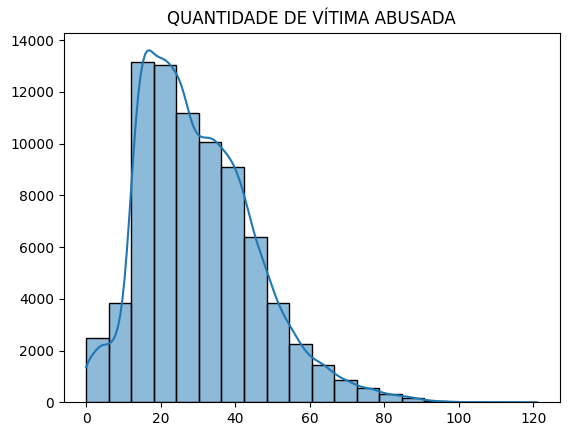

In [ ]:
# Quantidade de vítima abusada por idade
sns.histplot(base_final, x ="Idade", bins = 20, kde = True);
plt.xlabel("")
plt.ylabel("")
plt.title('QUANTIDADE DE VÍTIMA ABUSADA')
plt.show()

Text(0, 0.5, '')

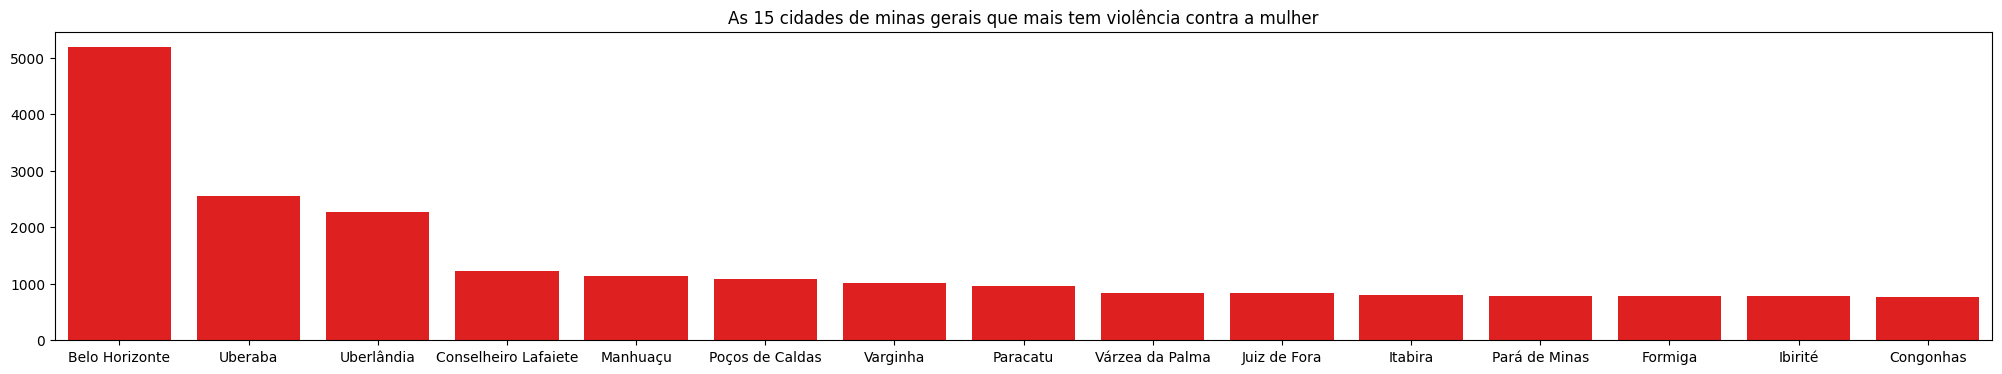

In [ ]:
# As 15 cidade que mais possuem ocorrência
contagem_cidades = base_final['Município de Residência'].value_counts()
top_15_cidades = contagem_cidades.head(15)
plt.figure(figsize=(25, 4))
sns.countplot(base_final, x="Município de Residência", order=top_15_cidades.index, color="red");
plt.title("As 15 cidades de minas gerais que mais tem violência contra a mulher")
plt.xlabel("")
plt.ylabel("")

In [ ]:
# Grafico que representa o local de violência da vítima
fig = px.treemap(base_final, path=['Local de Ocorrência',], color="Idade")
fig.show()

In [ ]:
# Grafico das vitimas se foram abusdas novamente
fig = fig = px.treemap(base_final, path=["Ocorrências Anteriores"], color="Idade")
fig.show()

In [ ]:
# Grafico que mostra lesão autoprovocada pela vítima
fig = fig = px.treemap(base_final, path=["Lesões Autoprovocadas"], color="Idade")
fig.show()

In [ ]:
#Grafico que mostra se a vítima sofreu violência física
fig = fig = px.treemap(base_final, path=["Violência Física"], color="Idade")
fig.show()

In [ ]:
# Grafico vitima abusada pela raça
fig = fig = px.treemap(base_final, path=["Raça"], color="Idade")
fig.show()

In [ ]:
# Grafico vitima que sofreram violencia psicológica
fig = fig = px.treemap(base_final, path=["Violência Psicológica"], color="Idade")
fig.show()

In [ ]:
# Grafico vitima que sofreram violencia sexual
fig = fig = px.treemap(base_final, path=["Violência Sexual"], color="Idade")
fig.show()

In [ ]:
# Grafico vitima que sofreram violencia por mês
fig = fig = px.treemap(base_final, path=["Data de Notificação",], color="Idade")
fig.show()

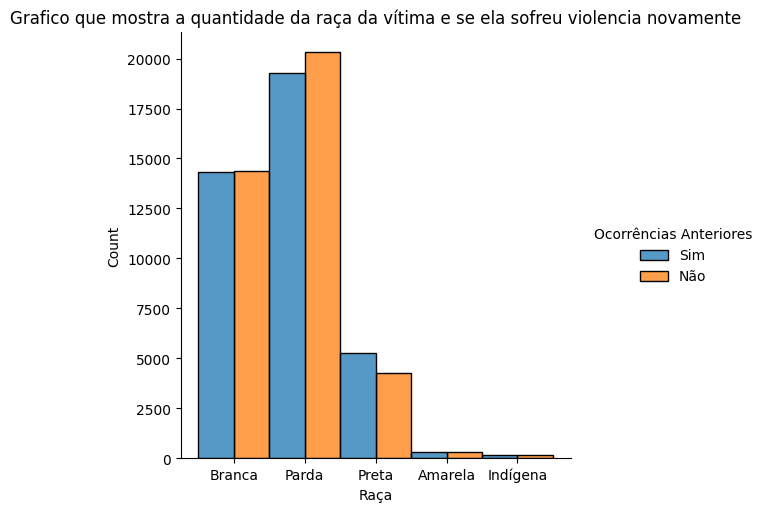

In [ ]:
sns.displot(base_final, x="Raça", hue="Ocorrências Anteriores",  multiple="dodge");
plt.title("Grafico que mostra a quantidade da raça da vítima e se ela sofreu violencia novamente");

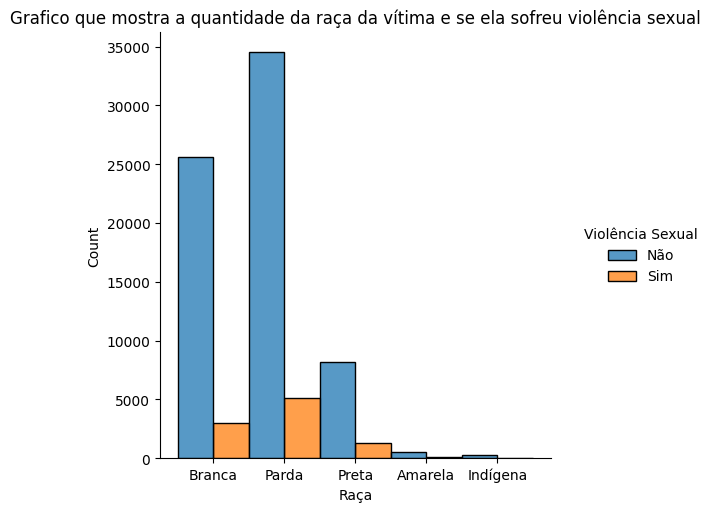

In [ ]:
sns.displot(base_final, x="Raça", hue="Violência Sexual",  multiple="dodge");
plt.title("Grafico que mostra a quantidade da raça da vítima e se ela sofreu violência sexual");

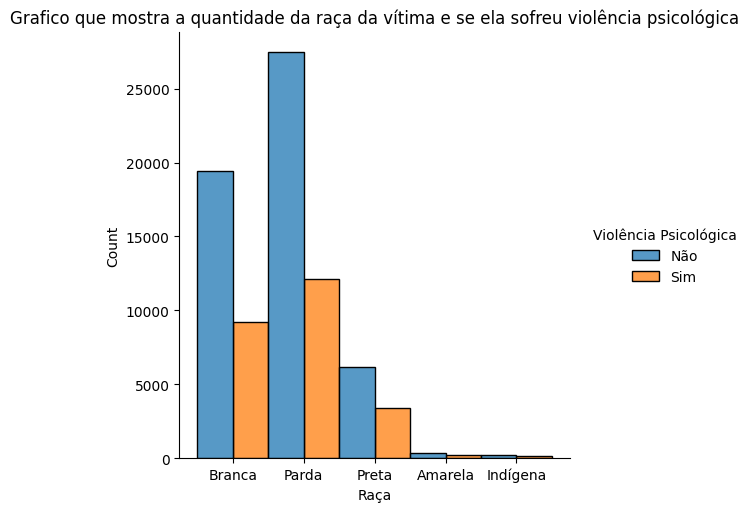

In [ ]:
sns.displot(base_final, x="Raça", hue="Violência Psicológica",  multiple="dodge");
plt.title("Grafico que mostra a quantidade da raça da vítima e se ela sofreu violência psicológica");

#Preparando o machine Learning

In [ ]:
base_final

,Data de Notificação,Idade,Sexo,Raça,Município de Residência,Local de Ocorrência,Ocorrências Anteriores,Lesões Autoprovocadas,Violência Física,Violência Psicológica,Violência Sexual,Número de Envolvidos,Gênero do Autor
0,January,14.0,Feminino,Branca,Rio Novo,Residencia,Sim,Sim,Sim,Não,Não,Um,Feminino
1,January,46.0,Feminino,Branca,Carmo do Rio Claro,Residencia,Sim,Não,Sim,Não,Não,Um,Masculino
4,January,6.0,Feminino,Parda,Guaraciaba,Residencia,Sim,Não,Não,Não,Sim,Um,Masculino
5,January,54.0,Feminino,Parda,Cajuri,Residencia,Não,Sim,Não,Não,Não,Um,Feminino
6,January,46.0,Feminino,Parda,Cajuri,Residencia,Sim,Sim,Não,Não,Não,Um,Masculino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29672,September,35.0,Feminino,Branca,Araguari,Residencia,Sim,Sim,Sim,Sim,Não,Um,Masculino
29673,May,73.0,Feminino,Preta,Araguari,Residencia,Não,Não,Não,Não,Sim,Um,Masculino
29674,May,27.0,Feminino,Parda,Araguari,Residencia,Sim,Não,Sim,Não,Não,Um,Masculino
29676,March,23.0,Feminino,Branca,Araguari,Via pública,Não,Não,Sim,Não,Não,Dois ou mais,Masculino


In [ ]:
# Formatando as classes (rotulos/labels) para valores binários.
base_final['Violência Física'] = base_final['Violência Física'].replace("Sim", 0)
base_final['Violência Física'] = base_final['Violência Física'].replace("Não", 1)

In [ ]:
# Separando as classes e features.
x_feature = base_final.drop(base_final.columns[8], axis = 1).values
y_class = base_final.iloc[:,8].values
display(x_feature[0])

array(['January', 14.0, 'Feminino', 'Branca', 'Rio Novo', 'Residencia',
       'Sim', 'Sim', 'Não', 'Não', 'Um', 'Feminino'], dtype=object)

In [ ]:
# Aplicando a técnica Label Encolder.
from sklearn.preprocessing import LabelEncoder

data = LabelEncoder() #0
sexo = LabelEncoder() #2
raça = LabelEncoder() #3
municipio_residencia = LabelEncoder() #4
local = LabelEncoder() #5
ocorrencia_anterior = LabelEncoder() #6
lesão = LabelEncoder() #7
psicologica = LabelEncoder() #8
sexual = LabelEncoder() #9
Envolvidos = LabelEncoder() #10
genero = LabelEncoder() #11

x_feature[:,0] = data.fit_transform(x_feature[:,0])
x_feature[:,2] = sexo.fit_transform(x_feature[:,2])
x_feature[:,3] = raça.fit_transform(x_feature[:,3])
x_feature[:,4] = municipio_residencia.fit_transform(x_feature[:,4])
x_feature[:,5] = local.fit_transform(x_feature[:,5])
x_feature[:,6] = ocorrencia_anterior.fit_transform(x_feature[:,6])
x_feature[:,7] = lesão.fit_transform(x_feature[:,7])
x_feature[:,8] = psicologica.fit_transform(x_feature[:,8])
x_feature[:,9] = sexual.fit_transform(x_feature[:,9])
x_feature[:,10] = Envolvidos.fit_transform(x_feature[:,10])
x_feature[:,11] = genero.fit_transform(x_feature[:,11])



In [ ]:
# Aplicando a técnica One Hot Encolder.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_feature = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,3,4,5,6,7,8,9,10,11])], remainder ='passthrough')
x_feature = onehotencoder_feature.fit_transform(x_feature).toarray()
x_feature.shape

In [ ]:
# Escalonando valores de (-1 a 1).

from sklearn.preprocessing import MinMaxScaler
scale_feature = MinMaxScaler(feature_range= (-1,1))
x_features = scale_feature.fit_transform(x_feature)

In [ ]:
# Dividindo treino e teste.
from sklearn.model_selection import train_test_split

x_feature_train, x_feature_test, y_class_train, y_class_test = train_test_split(x_feature , y_class , test_size = 0.25 , random_state = 1234)

print(x_feature_train.shape)
print(y_class_train.shape)

print("--"*20)

print(x_feature_test.shape)
print(y_class_test.shape)

(59036, 884)
(59036,)
----------------------------------------
(19679, 884)
(19679,)


In [ ]:
# Aplicando o modelo Ramdom Florest Classifier.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow import keras

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(x_feature_train, y_class_train)

RandomForestClassifier()

#Avaliações dos modelos

Regressão logística: 79%

Arvore de decisão: 78%

Naive Bayes: 76%

Random Forest Classifier 82%

Gradient Boosting (Gradiente Impulsionado): 78%

In [ ]:
# Aplicando a técnica Cross Validation do modelo Random Forest Classifier.
print("**"*20)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1234)

scores = cross_val_score(modelo, x_feature, y_class, cv=kf, scoring='accuracy')

for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: {score:.2f}")

mean_score = np.mean(scores)
print("--"*20)
print(f"Média das Pontuações: {mean_score:.2f}")
print("--"*20)
print("**"*20)


****************************************
Fold 1: 0.82
Fold 2: 0.81
Fold 3: 0.83
Fold 4: 0.82
Fold 5: 0.82
Fold 6: 0.81
Fold 7: 0.82
Fold 8: 0.82
Fold 9: 0.82
Fold 10: 0.82
----------------------------------------
Média das Pontuações: 0.82
----------------------------------------
****************************************


In [ ]:
# Realizando a previsão do modelo e acurracia.
previsão = modelo.predict(x_feature_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_class_test , previsão)


0.8194013923471721

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     13792
           1       0.74      0.61      0.67      5887

    accuracy                           0.82     19679
   macro avg       0.79      0.76      0.77     19679
weighted avg       0.81      0.82      0.81     19679



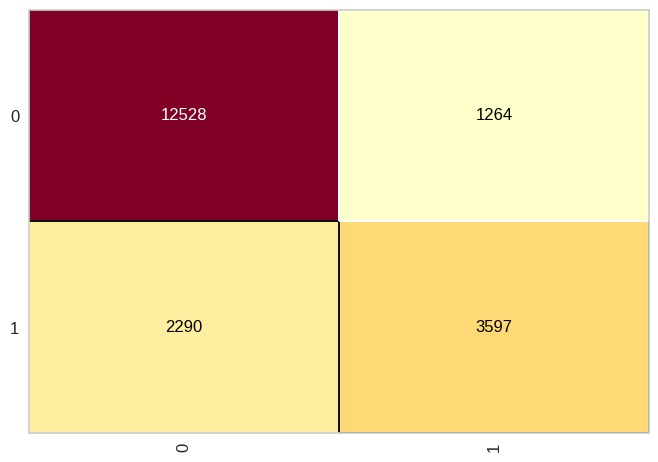

In [ ]:
# Gerando gráfico de confusão.
from yellowbrick.classifier import ConfusionMatrix
cn = ConfusionMatrix(modelo)
cn.fit(x_feature_train, y_class_train)
cn.score(x_feature_test, y_class_test)
print(classification_report(y_class_test , previsão))